In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd   /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 71.2 MB/s eta 0:00:00


In [ ]:
!pip install transformers --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling transformers-4.37.2:
      Successfully uninstalled transformers-4.37.2


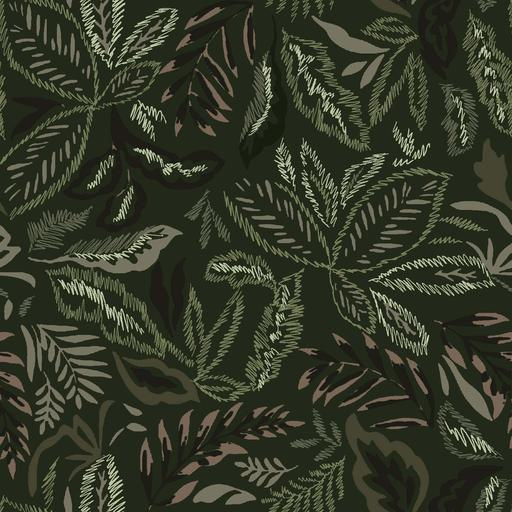

In [ ]:
import requests
from PIL import Image

image1 = Image.open("/content/drive/MyDrive/resize_images/abstract (23).jpg")
image2 = Image.open("/content/drive/MyDrive/resize_images/floral (20).jpg")

# image1
image2

In [ ]:
import requests
import torch
from PIL import Image
from io import BytesIO

from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image

In [ ]:
DEVICE = "cuda:0"

processor = AutoProcessor.from_pretrained("HuggingFaceM4/idefics2-8b")
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceM4/idefics2-8b",
).to(DEVICE)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/74.4k [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.64G [00:00<?, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/4.25G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

This image features a green and brown leafy pattern with intricate embroidery. The leaves are depicted in various sizes and shapes, creating a soothing and calming effect. The pattern is abstract and modern, with no specific artistic influences or styles. The colors are primarily green and brown, with some pink and gray tones. The emotional tone of the pattern is serene and relaxing.


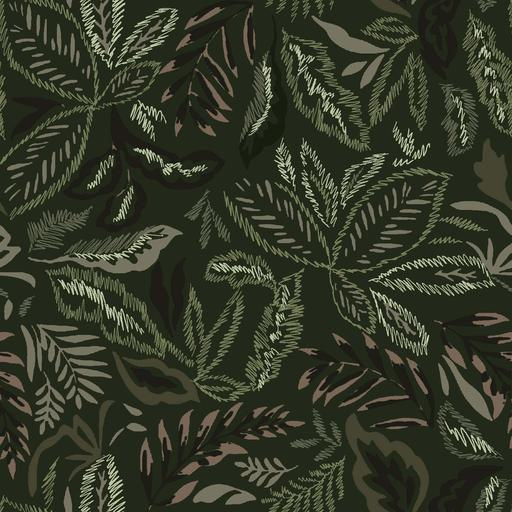

In [ ]:
from transformers import AutoProcessor, AutoModelForVision2Seq
import torch


prompt = """USER: <image>\n Based on the following details, generate a detailed description for the provided image in exactly two sentences, covering all specified aspects.
Detail key elements like shapes, lines, and textures (e.g., geometric, abstract), describe primary and secondary colors along with any thematic palette (e.g., pastels), note artistic influences or styles (e.g., Art Deco, modern), describe the emotional tone (e.g., soothing, energetic), classify the pattern, and highlight distinctive features.
\nASSISTANT:"""

inputs = processor(text=prompt, images=[image2], return_tensors="pt")
inputs = {k: v.to("cuda:0") for k, v in inputs.items()}

generated_ids = model.generate(**inputs, max_new_tokens=80, eos_token_id=processor.tokenizer.eos_token_id)

generated_texts = processor.batch_decode(generated_ids, skip_special_tokens=True)

# Extract only the generated text
generated_text = generated_texts[0]
separator = "\nASSISTANT:"
if separator in generated_text:
    generated_text = generated_text.split(separator, 1)[1].strip()

print(generated_text)

image2

This image is a modern art piece that features abstract shapes and lines. The colors used in the piece are primarily blue, green, and beige. The pattern is very dynamic and energetic, with the shapes and lines creating a sense of movement. The artistic influences in this piece are modern and abstract, with a focus on geometric shapes and lines. The emotional tone of the piece is soothing and


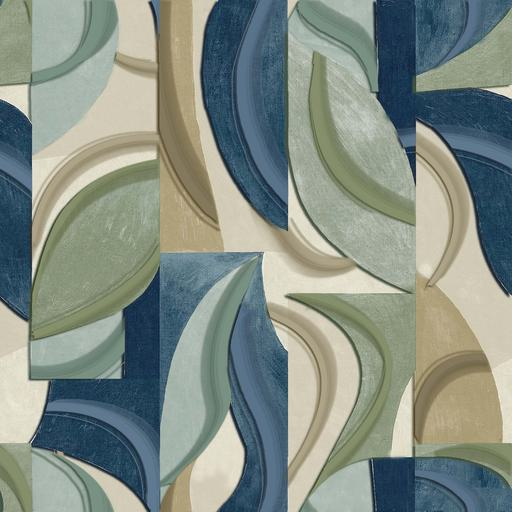

In [ ]:
inputs = processor(text=prompt, images=[image1], return_tensors="pt")
inputs = {k: v.to("cuda:0") for k, v in inputs.items()}

generated_ids = model.generate(**inputs, max_new_tokens=80, eos_token_id=processor.tokenizer.eos_token_id)

generated_texts = processor.batch_decode(generated_ids, skip_special_tokens=True)

# Extract only the generated text
generated_text = generated_texts[0]
separator = "\nASSISTANT:"
if separator in generated_text:
    generated_text = generated_text.split(separator, 1)[1].strip()

print(generated_text)

image1

Generating description for 100 images

In [ ]:
import os
import random

seed = 42
random.seed(seed)

image_paths = []

directory = "/content/drive/MyDrive/abstract_2024-05-09_0519"

all_files = os.listdir(directory)

image_files = [file for file in all_files if file.endswith('.jpg')]

random.seed(seed)
random_image_paths = random.sample(image_files, 100)

image_paths.extend([os.path.join(directory, image) for image in random_image_paths])

print(image_paths)



['/content/drive/MyDrive/abstract_2024-05-09_0519/5030930-5.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/50310112-4.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/4031065.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/10301077-2.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/5031120-4.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/2030902-1.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/5031148 -3.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/5031210-4.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/50310136-3.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/120312012-1.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/5031120.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/5031207-4.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/50310136.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/9031237 -2.jpg', '/content/drive/MyDrive/abstract_2024-05-09_0519/5031255 -5.jpg', '/content/drive/MyDri

In [ ]:

import pandas as pd


# Create an empty list to store row dictionaries
rows = []

for image_path in image_paths:
    # Open the image
    image = Image.open(image_path)
    image = image.resize((512, 512))

    # Process image and generate description
    inputs = processor(text=prompt, images=[image], return_tensors="pt")
    inputs = {k: v.to(DEVICE) for k, v in inputs.items()}

    generated_ids = model.generate(**inputs, max_new_tokens=80, eos_token_id=processor.tokenizer.eos_token_id)
    generated_texts = processor.batch_decode(generated_ids, skip_special_tokens=True)

    generated_text = generated_texts[0].split(separator, 1)[1].strip()

    # Extract image name
    image_name = image_path.split("/")[-1]

    # Append row dictionary to the list
    rows.append({'Image Name': image_name, 'Description': generated_text})

# Create DataFrame from the list of row dictionaries
results_df = pd.DataFrame(rows)

# Display the DataFrame
print(results_df)


         Image Name                                        Description
0     5030930-5.jpg  The provided image is an abstract pattern with...
1    50310112-4.jpg  This image features an abstract pattern with v...
2       4031065.jpg  This image features an abstract pattern with v...
3    10301077-2.jpg  This image features an abstract painting with ...
4     5031120-4.jpg  This image features an abstract, modern art pi...
..              ...                                                ...
95   50310139-3.jpg  This image features an abstract pattern with v...
96   50309125-3.jpg  The provided image is an abstract pattern with...
97    5031260-4.jpg  This image features an abstract pattern with a...
98  120310014-2.jpg  The provided image is an abstract painting wit...
99    4031246-4.jpg  This image features an abstract pattern with a...

[100 rows x 2 columns]


In [ ]:
results_df.to_csv("/content/drive/MyDrive/idefics2-8b_results.csv", index=False)


In [ ]:
results_df.to_csv("/content/idefics2-8b_results.csv", index=False)